<a href="https://colab.research.google.com/github/beepmo/gator/blob/main/eis_explainer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q impedance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 402.2 kB/s eta 0:00:00


In [2]:
from impedance.models.circuits import CustomCircuit
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np


# The Warburg impedance makes warped semicircle.

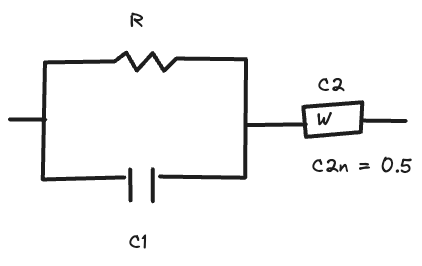

In [3]:
# prompt: create an interactive widget to update scalar values for variables R0, C0


@widgets.interact(
    R=(3, 12, 1),
    C1=(-12, -2, 1),
    C2=(-12, -2, 1),
    C2n=(0, 1, 0.1),
    w0=(-6, 0, 1),
    w1=(0,9,1)
)
def update_scalars(R, C1, C2, C2n,w0,w1):
    # Update the values of R0 and C0 based on the slider values.
    circuit = 'p(R0,C0)-CPE0'
    init = [10**R, 10**C1, 10**C2, C2n]

    circuit = CustomCircuit(circuit, initial_guess=init)

    range = np.logspace(w0,w1,200)
    Z_fit = circuit.predict(range)

    plt.plot(Z_fit.real, -Z_fit.imag, 'o')
    plt.ylabel('Imaginary')
    plt.xlabel('Real')
    plt.title('Nyquist')
    plt.show()

    plt.plot(range, -Z_fit.imag, 'o')
    plt.ylabel('Im(Z)')
    plt.xlabel('freq')
    plt.title('Bode')
    plt.loglog()
    plt.show()

    print(circuit)
    return circuit


interactive(children=(IntSlider(value=7, description='R', max=12, min=3), IntSlider(value=-7, description='C1'…

# Basically Randles

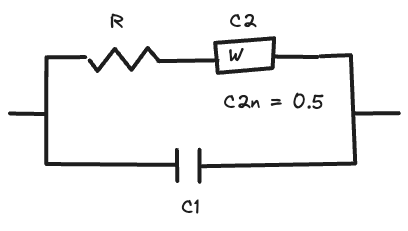

In [6]:
# prompt: create an interactive widget to update scalar values for variables R0, C0


@widgets.interact(
    R=(3, 12, 1),
    C1=(-12, -2, 1),
    C2=(-12, -2, 1),
    C2n=(0, 1, 0.1),
    w0=(-6, 0, 1),
    w1=(0,9,1)
)
def update_scalars(R, C1, C2, C2n,w0,w1):
    # Update the values of R0 and C0 based on the slider values.
    circuit = 'p(R0-CPE0,C0)'
    init = [10**R, 10**C2, C2n, 10**C1]

    circuit = CustomCircuit(circuit, initial_guess=init)

    range = np.logspace(w0,w1,200)
    Z_fit = circuit.predict(range)

    plt.plot(Z_fit.real, -Z_fit.imag, 'o')
    plt.ylabel('Imaginary')
    plt.xlabel('Real')
    plt.title('Nyquist')
    plt.show()

    plt.plot(range, -Z_fit.imag, 'o')
    plt.ylabel('Im(Z)')
    plt.xlabel('freq')
    plt.title('Bode')
    plt.loglog()
    plt.show()

    print(circuit)
    return circuit


interactive(children=(IntSlider(value=7, description='R', max=12, min=3), IntSlider(value=-7, description='C1'…

# Parabola from small $n$ in Randles CPE

$n\to 0$ approches RC-circuit.

In [14]:
# prompt: create an interactive widget to update scalar values for variables R0, C0


@widgets.interact(
    R=(3, 12, 1),
    C1=(-12, -2, 1),
    C2=(-12, -2, 1),
    C2n=(0, 1, 0.1),
    w0=(-6, 0, 1),
    w1=(0,9,1)
)
def update_scalars(R, C1, C2, C2n,w0,w1):
    # Update the values of R0 and C0 based on the slider values.
    # circuit = 'p(R0-CPE0,C0)'
    # init = [10**R, 10**C2, C2n, 10**C1]
    circuit = 'p(CPE0,C0)'
    init = [10**C2, C2n, 10**C1]

    circuit = CustomCircuit(circuit, initial_guess=init)

    range = np.logspace(w0,w1,200)
    Z_fit = circuit.predict(range)

    plt.plot(Z_fit.real, -Z_fit.imag, 'o')
    plt.ylabel('Imaginary')
    plt.xlabel('Real')
    plt.title('Nyquist')
    plt.show()

    plt.plot(range, -Z_fit.imag, 'o')
    plt.ylabel('Im(Z)')
    plt.xlabel('freq')
    plt.title('Bode')
    plt.loglog()
    plt.show()

    print(circuit)
    return circuit


interactive(children=(IntSlider(value=7, description='R', max=12, min=3), IntSlider(value=-7, description='C1'…